# Sample notebook showcasing R on Jupyter

An overview of some plotting controls available in R for visualizing networks and visualizing tree models.

To execute a cell, select it and then use **[Shift] + [Enter]**.

In [1]:
# Default plot size is 7 inches x 7 inches; change to 7 x 3
options(repr.plot.height=3)

In [ ]:
library(rpart)  # CART tree models
library(rpart.plot)  # Pretty plotting
library(vcd)  # Spline plotting

In [3]:
titanic <- as.data.frame(Titanic)
head(titanic, n=5)
summary(titanic)

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0


  Class       Sex        Age     Survived      Freq       
 1st :8   Male  :16   Child:16   No :16   Min.   :  0.00  
 2nd :8   Female:16   Adult:16   Yes:16   1st Qu.:  0.75  
 3rd :8                                   Median : 13.50  
 Crew:8                                   Mean   : 68.78  
                                          3rd Qu.: 77.00  
                                          Max.   :670.00  

## Data visualization

Before making the tree models, try some visualization.

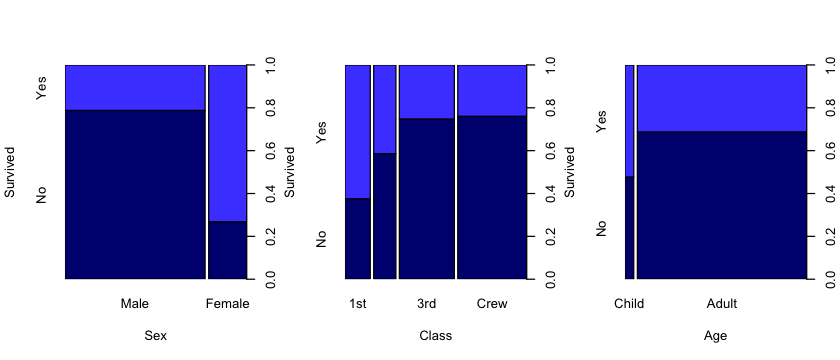

In [4]:
Survival.by.Sex <- xtabs(Freq~Sex+Survived, data=titanic)
Survival.by.Class <- xtabs(Freq~Class+Survived, data=titanic)
Survival.by.Age <- xtabs(Freq~Age+Survived, data=titanic)

oldpar <- par(mfrow=c(1,3))
options(repr.plot.width=7)
spineplot(Survival.by.Sex, col=c(rgb(0, 0, 0.5), rgb(0.3, 0.3, 1)))
spineplot(Survival.by.Class, col=c(rgb(0, 0, 0.5), rgb(0.3, 0.3, 1)))
spineplot(Survival.by.Age, col=c(rgb(0, 0, 0.5), rgb(0.3, 0.3, 1)))
par(oldpar)

In [5]:
cart.control <- rpart.control(minbucket=1, cp=0, maxdepth=5)

model.cart = rpart(
    Survived ~ . , 
    data=titanic[ , -5],
    weights=titanic$Freq,
    method="class",
    #xval=10,
    control=cart.control
)

print(model.cart)
printcp(model.cart)

n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 32 711 No (0.6769650 0.3230350)  
   2) Sex=Male 16 367 No (0.7879838 0.2120162)  
     4) Age=Adult 8 338 No (0.7972406 0.2027594) *
     5) Age=Child 8  29 No (0.5468750 0.4531250)  
      10) Class=3rd 2  13 No (0.7291667 0.2708333) *
      11) Class=1st,2nd 4   0 Yes (0.0000000 1.0000000) *
   3) Sex=Female 16 126 Yes (0.2680851 0.7319149)  
     6) Class=3rd 4  90 No (0.5408163 0.4591837) *
     7) Class=1st,2nd,Crew 12  20 Yes (0.0729927 0.9270073) *

Classification tree:
rpart(formula = Survived ~ ., data = titanic[, -5], weights = titanic$Freq, 
    method = "class", control = cart.control)

Variables actually used in tree construction:
[1] Age   Class Sex  

Root node error: 711/32 = 22.219

n= 32 

        CP nsplit rel error xerror      xstd
1 0.306610      0   1.00000 1.0000 0.0308566
2 0.022504      1   0.69339 2.4529 0.0267640
3 0.011252      2   0.67089 3.0577 0.0072633
4 0.000000      4

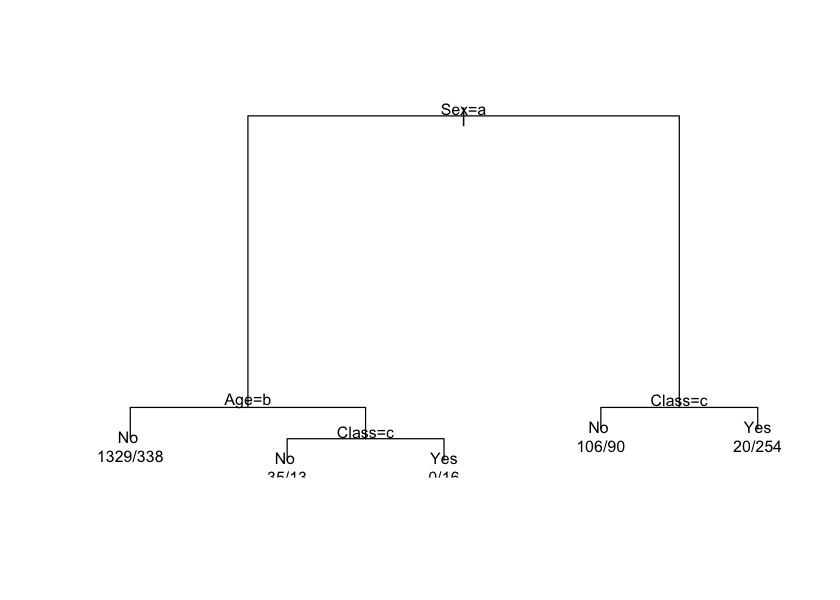

In [6]:
# The standard Tree plot
plot(model.cart, margin=0.01)
text(model.cart, use.n=TRUE, cex=.8)
options(repr.plot.height=5)

cex 1   xlim c(0, 1)   ylim c(-0.6, 1.6)


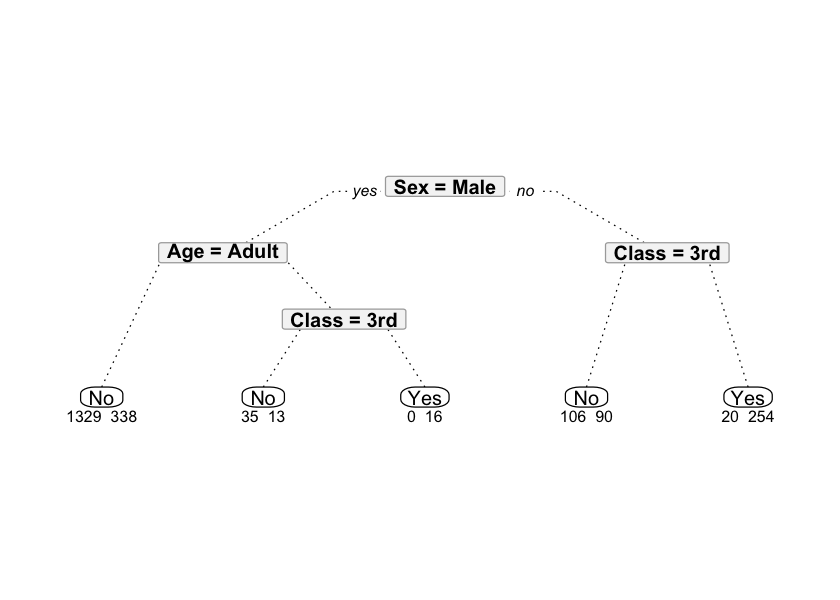

In [7]:
# Better visualization using rpart.plot
prp(x=model.cart,
    fallen.leaves=TRUE, branch=.5, faclen=0, trace=1,
    extra=1, under=TRUE,
    branch.lty=3,
    split.box.col="whitesmoke", split.border.col="darkgray", split.round=0.4)

In [8]:
# Confusion Matrix given a cutoff
threshold = 0.8
cm <- table(titanic$Survived,
            predict(model.cart, titanic[,-5], type="prob")[,2] > threshold)
print(cm)

     
      FALSE TRUE
  No      7    9
  Yes     7    9


# For fun, let's make a Caffeine molecule

This notebook also imports an extra library, `igraph`. The Docker container sets this up on
[mybinder.org][mybinder], without the student needing to import anything.

We'll use an adjacency matrix to describe the network topology of Caffeine, and create the graph
using `graph.adjacency(<the adjacency matrix>)` to demonstrate some standard selection and
plotting functions using R's `igraph` library. The chemical formula below demonstrates use of inline LaTeX math markup, and the image inline image placement.

$$C_8H_{10}N_4O_2$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Koffein_-_Caffeine.svg/220px-Koffein_-_Caffeine.svg.png" alt="Caffeine molecule"></img>

[mybinder]: http://mybinder.org

In [9]:
library(igraph)

In [10]:
caffeine.adjacency <- as.matrix(read.table("caffeine.txt", sep=" "))
caffeine <- graph.adjacency(caffeine.adjacency, mode='undirected')

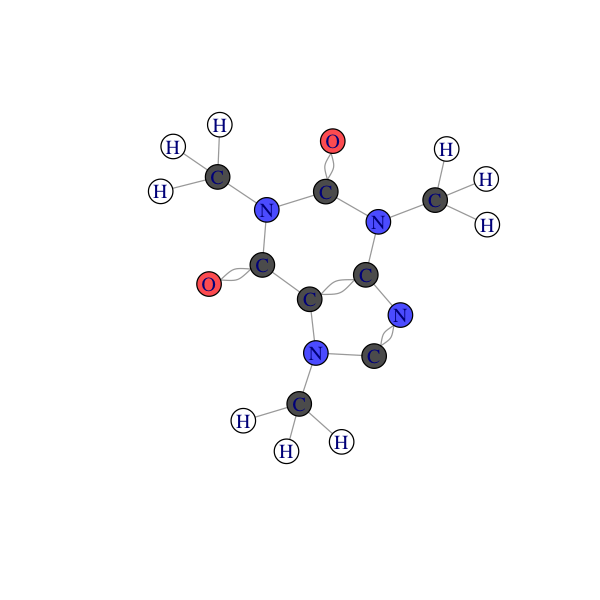

In [11]:
V(caffeine)$name <- strsplit('CHHHNCOCNCHHHCNCNCHHHCO', '')[[1]]
V(caffeine)$color <- rgb(1, 1, 1)
V(caffeine)[name == 'C']$color <- rgb(0, 0, 0, 0.7)
V(caffeine)[name == 'O']$color <- rgb(1, 0, 0, 0.7)
V(caffeine)[name == 'N']$color <- rgb(0, 0, 1, 0.7)

plot(caffeine)
options(repr.plot.height=5, repr.plot.width=5)